In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

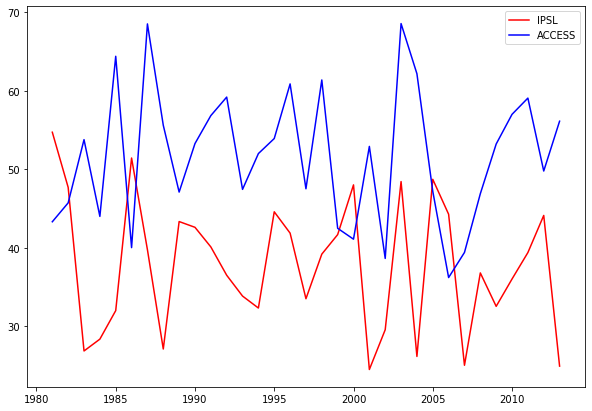

In [3]:
rhHistvals=[]
# rh Data
rhDataIPSL = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_hurs_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')
rhDataIPSL.hurs.time[0]
histrhIPSL=rhDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).hurs
#histrh[0].values
histrhIPSL[1].values
histrhIPSL.values=histrhIPSL.values*mask

# Area Average
rhTS1=histrhIPSL.mean(dim=['latitude','longitude'], skipna=True)
rhTs=(rhTS1[((rhTS1.time.dt.month>11) | (rhTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histrhTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    rhT=rhTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histrhTs.append(rhT.mean())
rhHistvals.append(histrhTs) 



# rh Data
rhDataACCESS = xr.open_dataset('../../Data/CMIP6/ACCESS-CM2/hursNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc')
rhDataACCESS.hurs.time[0]
histrh=rhDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86)).hurs

#histrh.values=histrh.values-histrh[0].values
histrh[1].values
histrh.values=histrh.values*mask


# Area Average
rhTS1=histrh.mean(dim=['latitude','longitude'], skipna=True)

rhTs=(rhTS1[((rhTS1.time.dt.month>11) | (rhTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histrhTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    rhT=rhTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histrhTs.append(rhT.mean())
rhHistvals.append(histrhTs)
 


fig = plt.figure(figsize=(10,7))
plt.plot(x,rhHistvals[0],label='IPSL',color='Red')
plt.plot(x,rhHistvals[1],label='ACCESS',color='Blue')
#plt.plot(x,rhHistvals[2],label='EC-Earth3',color='Black')
plt.legend()

#plt.savefig('Histrh_Anthropogenic.eps')
plt.show()


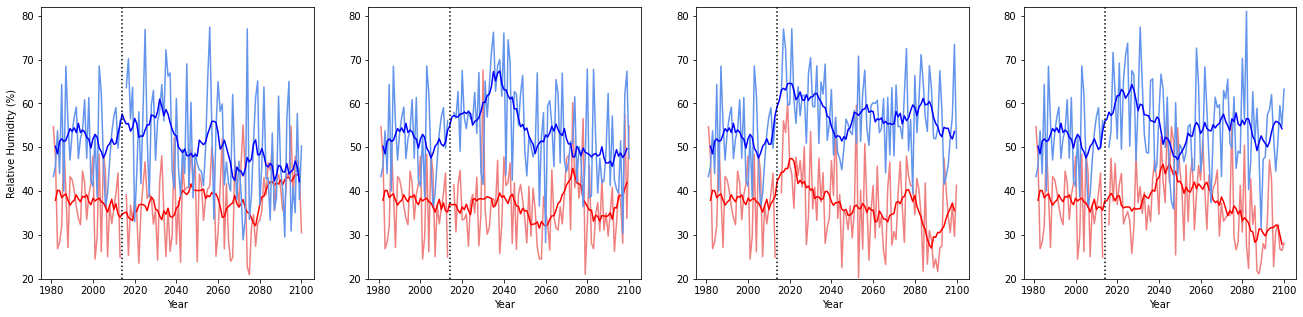

In [7]:
ssps=['126','245','370','585']
fig = plt.figure(figsize=(22.5,5))

i=1
for sp in ssps:
    
    x=np.arange(1981,2014)

    plt.subplot(1, 4, i)

    #plt.plot(x,EnsBCHist,label='Historical',color='gainsboro')
    plt.plot(x,rhHistvals[0],color='lightcoral')
    plt.plot(x,rhHistvals[1],color='cornflowerblue')
    x=np.arange(2016,2101)
    rhFut=[]
# rh Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'
    rhDataIPSL = xr.open_dataset(folderString+'Regrid_hurs_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    rhDataIPSL.hurs.time[0]
    histrhIPSL=rhDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).hurs
#histrh[0].values
    histrhIPSL[1].values
    histrhIPSL.values=histrhIPSL.values*mask

# Area Average
    rhTS1=histrhIPSL.mean(dim=['latitude','longitude'], skipna=True)

    rhTs=(rhTS1[((rhTS1.time.dt.month>11) | (rhTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    #x=np.arange(1981,2014)
    histrhTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        rhT=rhTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histrhTs.append(rhT.mean())
    rhFut.append(histrhTs) 

    # rh Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/ACCESS-CM2/processed/'
    rhDataACCESS = xr.open_dataset(folderString+'Regrid_hurs_day_ACCESS-CM2_ssp'+sp+'_r1i1p1f1_gn_20150101-21001231.nc')
    rhDataACCESS.hurs.time[0]
    histrh=rhDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86)).hurs

#histrh.values=histrh.values-histrh[0].values
    histrh[1].values
    histrh.values=histrh.values*mask


# Area Average
    rhTS1=histrh.mean(dim=['latitude','longitude'], skipna=True)

    rhTs=(rhTS1[((rhTS1.time.dt.month>11) | (rhTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    histrhTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        rhT=rhTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histrhTs.append(rhT.mean())
    rhFut.append(histrhTs)

    histrhTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
        rhT=rhTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histrhTs.append(rhT.mean())
    rhFut.append(histrhTs)
    plt.plot(x,rhFut[0],color='lightcoral')
    jointList=rhHistvals[0]+rhFut[0]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='IPSL-CM6A-LR',color='red')
    plt.plot(x,rhFut[1],color='cornflowerblue')
    jointList=rhHistvals[1]+rhFut[1]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='ACCESS-CM2',color='blue')
    plt.ylim(20,82)
    plt.axvline(x=2014,color='black',linestyle=':')
    plt.xlabel('Year') 
    if i == 1:
        #plt.legend()
        plt.ylabel('Relative Humidity (%)')
    i=i+1

plt.savefig('Models_rh_10YearMean.eps')
plt.show()
        